In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans

In [11]:
df = pd.read_csv('social_marketing.csv')
df.isna().sum()
print('Before cleaning df count =',df.shape[0])
df = df.dropna()
df.isna().sum()
print('After cleaning df count =',df.shape[0])
df

Before cleaning df count = 7882
After cleaning df count = 7882


,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,y3ijoqfgd,5,4,2,1,0,1,0,1,0,...,0,0,0,0,0,2,0,0,0,0
7878,n6gud4ext,9,3,2,4,0,1,0,4,1,...,0,1,0,1,0,5,0,1,0,0
7879,f71rt6cyg,3,2,1,1,0,4,1,2,1,...,1,0,1,1,0,6,1,0,0,0
7880,gevsyip7o,3,2,0,4,0,0,1,1,1,...,0,0,1,0,0,1,1,0,1,12


In [12]:
df.columns

Index(['Unnamed: 0', 'chatter', 'current_events', 'travel', 'photo_sharing',
       'uncategorized', 'tv_film', 'sports_fandom', 'politics', 'food',
       'family', 'home_and_garden', 'music', 'news', 'online_gaming',
       'shopping', 'health_nutrition', 'college_uni', 'sports_playing',
       'cooking', 'eco', 'computers', 'business', 'outdoors', 'crafts',
       'automotive', 'art', 'religion', 'beauty', 'parenting', 'dating',
       'school', 'personal_fitness', 'fashion', 'small_business', 'spam',
       'adult'],
      dtype='object')

In [13]:
print(df[df['adult'] != 0]['adult'].describe())

print(df[df['spam'] != 0]['spam'].describe())

count    570.000000
mean       5.577193
std        4.079419
min        1.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       26.000000
Name: adult, dtype: float64
count    49.000000
mean      1.040816
std       0.199915
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: spam, dtype: float64


In [14]:
df_final = df[df['adult'] < 2]
df_final.set_index('Unnamed: 0', inplace = True)
df_final
#No need to clean spam

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
hmjoe4g3k,2,0,2,2,2,1,1,0,4,1,...,1,0,1,1,0,11,0,0,0,0
clk1m5w8s,3,3,2,1,1,1,4,1,2,2,...,0,0,0,1,4,0,0,0,0,0
jcsovtak3,6,3,4,3,1,5,0,2,1,1,...,0,1,0,1,0,0,1,0,0,0
3oeb4hiln,1,5,2,2,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
fd75x1vgk,5,2,0,6,1,0,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12t4msroj,0,1,1,1,0,7,7,0,3,3,...,3,1,3,0,2,0,1,2,0,0
y3ijoqfgd,5,4,2,1,0,1,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0
n6gud4ext,9,3,2,4,0,1,0,4,1,3,...,0,1,0,1,0,5,0,1,0,0


In [15]:
summary_stats = df_final.describe()
print(summary_stats)

# interest_counts = df_final.drop('Unnamed: 0', axis=1).sum()
interest_counts = df_final.sum()
print(interest_counts)

           chatter  current_events       travel  photo_sharing  uncategorized  \
count  7381.000000     7381.000000  7381.000000    7381.000000    7381.000000   
mean      4.397643        1.521339     1.573500       2.711828       0.802601   
std       3.544030        1.268649     2.301507       2.740246       0.933086   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  ...  \
count  7381.000000    7381.000000  7381.000000  7381.000000  7381.000000  ...   
mean      1.078445       1.593686     1.806801     1.385449     0.854356  ...   
std       1.668843       2.

In [16]:
# Rank interest categories based on total posts
sorted_interests = interest_counts.sort_values(ascending=False)

# Display sorted interests
print(sorted_interests)

chatter             32459
photo_sharing       20016
health_nutrition    19066
cooking             14818
politics            13336
sports_fandom       11763
travel              11614
college_uni         11531
current_events      11229
personal_fitness    10799
shopping            10348
food                10226
news                 8948
online_gaming        8877
religion             8060
tv_film              7960
fashion              7371
parenting            6707
family               6306
automotive           6044
uncategorized        5924
outdoors             5672
school               5599
art                  5261
dating               5247
beauty               5187
music                5051
sports_playing       4745
computers            4744
home_and_garden      3790
crafts               3765
eco                  3704
business             3131
small_business       2409
adult                  69
spam                    6
dtype: int64


In [17]:
scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_final.drop('Unnamed: 0', axis=1))
scaled_features = scaler.fit_transform(df_final)
scaled_features

array([[-0.67657575, -1.19926137,  0.18532612, ..., -0.5359957 ,
        -0.02852296, -0.09714187],
       [-0.39439201,  1.16561925,  0.18532612, ..., -0.5359957 ,
        -0.02852296, -0.09714187],
       [ 0.4521592 ,  1.16561925,  1.05438083, ..., -0.5359957 ,
        -0.02852296, -0.09714187],
       ...,
       [ 1.29871041,  1.16561925,  0.18532612, ...,  1.10625597,
        -0.02852296, -0.09714187],
       [-0.39439201,  0.37732571, -0.24920123, ..., -0.5359957 ,
        -0.02852296, -0.09714187],
       [-0.95875948,  1.95391279, -0.24920123, ...,  2.74850765,
        -0.02852296, -0.09714187]])

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# pca = PCA()
pca_result = pca.fit_transform(scaled_features)
pca.explained_variance_ratio_

array([0.12403322, 0.08042051])

c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

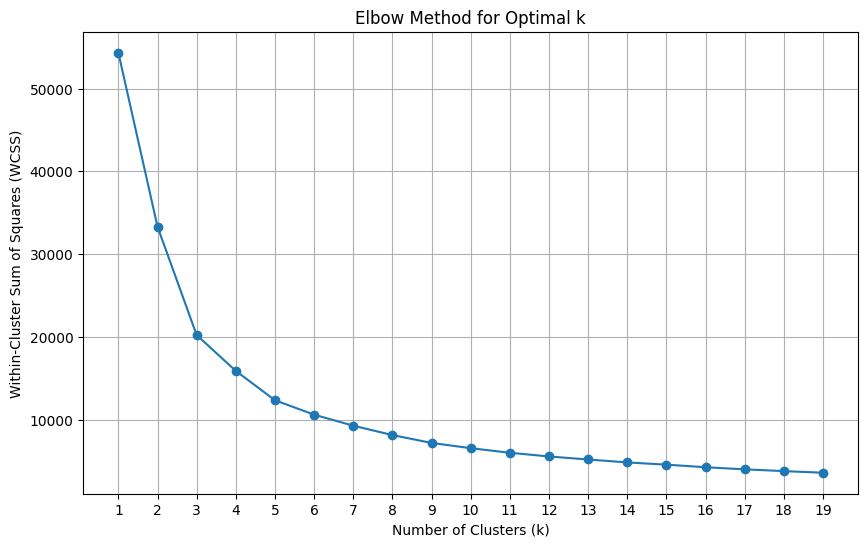

In [19]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=13)
    # kmeans.fit(df_final.drop('Unnamed: 0', axis=1))
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 20))
plt.grid(True)
plt.show()

In [20]:
# Assuming you want to cluster into 3 segments, you can adjust this value
n_clusters = 5

# Fit K-means model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=13)
cluster_labels = kmeans.fit_predict(pca_result)

# Add cluster labels to the dataset
df_final['Cluster'] = cluster_labels

# Display the dataset with cluster labels
print(df_final.head())

            chatter  current_events  travel  photo_sharing  uncategorized  \
Unnamed: 0                                                                  
hmjoe4g3k         2               0       2              2              2   
clk1m5w8s         3               3       2              1              1   
jcsovtak3         6               3       4              3              1   
3oeb4hiln         1               5       2              2              0   
fd75x1vgk         5               2       0              6              1   

            tv_film  sports_fandom  politics  food  family  ...  beauty  \
Unnamed: 0                                                  ...           
hmjoe4g3k         1              1         0     4       1  ...       0   
clk1m5w8s         1              4         1     2       2  ...       0   
jcsovtak3         5              0         2     1       1  ...       1   
3oeb4hiln         1              0         1     0       1  ...       1   
fd75x1vgk 

c:\Users\Abhijit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abhijit\AppData\Local\Temp\ipykernel_11592\3071906007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Cluster'] = cluster_labels


In [21]:
# Create a list to store dynamically named variables
cluster_data = []

for i in range(0, (n_clusters)):
    cluster = f"cluster{i+1}_df"  # Dynamic variable name
    print(f"{cluster}",'started')
    cluster_points = df_final[df_final['Cluster']==i]
    print('done') 

    cluster_data.append((cluster, cluster_points))



cluster1_df started
done
cluster2_df started
done
cluster3_df started
done
cluster4_df started
done
cluster5_df started
done


Cluster               0
spam                  2
adult                 4
small_business      361
dating              395
art                 408
computers           437
business            440
religion            440
home_and_garden     446
parenting           447
automotive          450
crafts              452
eco                 458
news                471
online_gaming       477
tv_film             487
sports_playing      499
school              499
family              505
outdoors            526
sports_fandom       531
politics            541
music               544
beauty              549
uncategorized       570
food                581
college_uni         585
health_nutrition    586
personal_fitness    587
travel              593
fashion             631
shopping            662
current_events      662
cooking             709
photo_sharing       749
chatter             758
dtype: int64


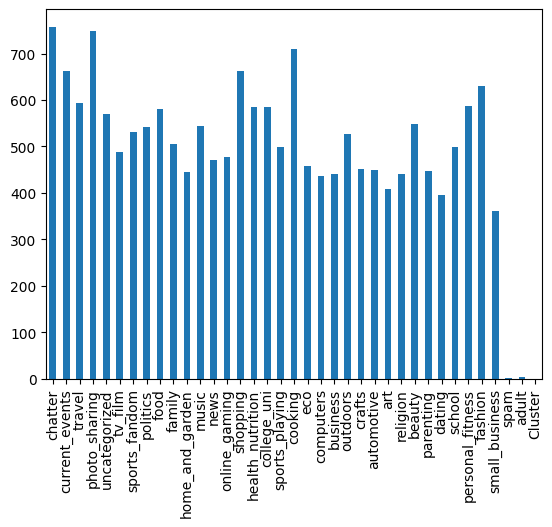

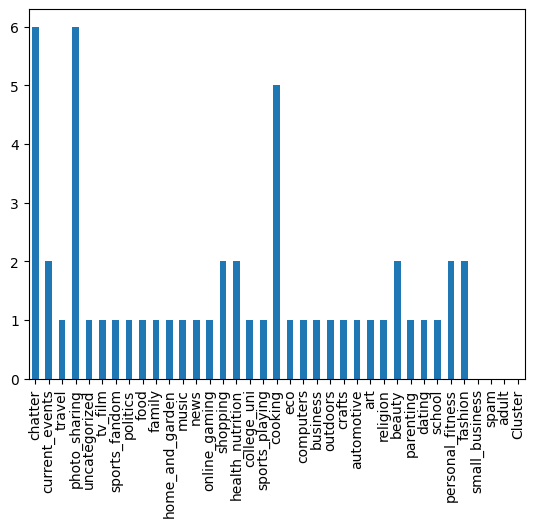

spam                   1
adult                 23
small_business       682
religion             805
art                  817
parenting            826
beauty               840
dating               846
crafts               847
school               876
business             902
computers            910
home_and_garden      934
eco                  978
automotive          1013
family              1021
online_gaming       1040
sports_playing      1057
news                1097
outdoors            1117
music               1136
fashion             1140
tv_film             1247
sports_fandom       1251
personal_fitness    1283
college_uni         1285
health_nutrition    1302
uncategorized       1328
food                1333
politics            1353
shopping            1512
travel              1535
cooking             1546
current_events      1768
photo_sharing       1933
chatter             2073
Cluster             2149
dtype: int64


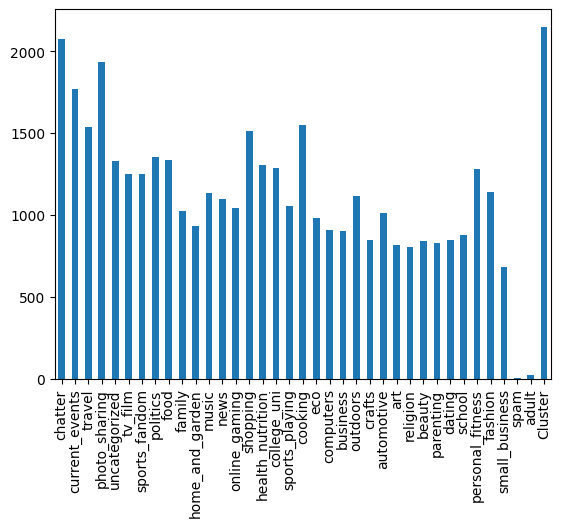

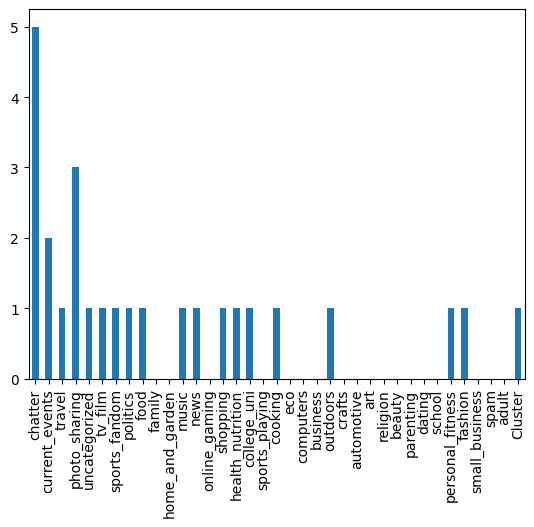

spam                  0
adult                 2
small_business      131
dating              143
business            151
art                 174
outdoors            182
eco                 185
politics            185
home_and_garden     187
music               191
uncategorized       193
computers           197
sports_playing      201
tv_film             201
news                201
online_gaming       206
college_uni         211
fashion             212
health_nutrition    219
personal_fitness    220
automotive          228
shopping            234
cooking             246
travel              247
crafts              251
beauty              255
current_events      288
photo_sharing       293
family              328
chatter             332
school              335
parenting           345
religion            348
food                349
sports_fandom       349
Cluster             349
dtype: int64


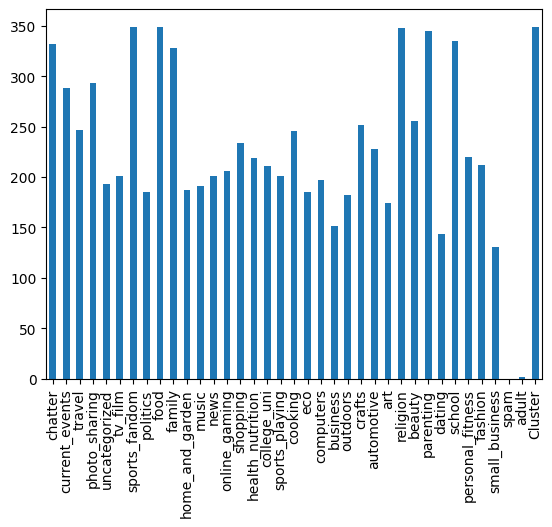

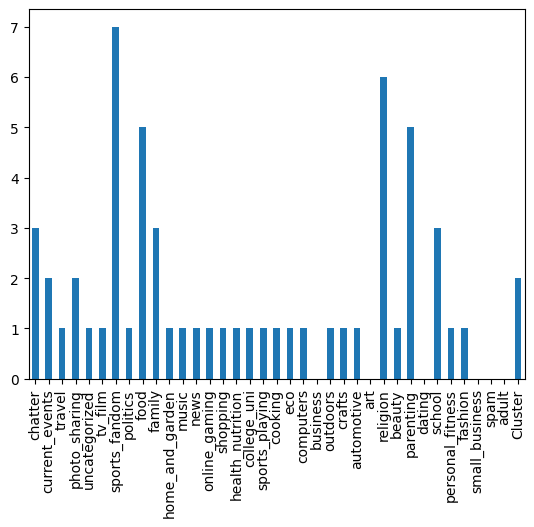

In [22]:
# for var_name, var_value in cluster_data:
    # print(f"{var_name}: {var_value}")
    # print(var_value.describe())



zero_counts = (cluster_data[0][1] != 0).sum()
print(zero_counts.sort_values())
# print(cluster_data[0][1].mean())
zero_counts.plot(kind = 'bar')
plt.show()
(cluster_data[0][1].median()).plot(kind = 'bar')
plt.show()

zero_counts = (cluster_data[1][1] != 0).sum()
print(zero_counts.sort_values())
zero_counts.plot(kind = 'bar')
plt.show()
(cluster_data[1][1].median()).plot(kind = 'bar')
plt.show()

zero_counts = (cluster_data[2][1] != 0).sum()
print(zero_counts.sort_values())
zero_counts.plot(kind = 'bar')
plt.show()
(cluster_data[2][1].median()).plot(kind = 'bar')
plt.show()


In [24]:
# cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_final.columns[:-1])

# #Plot feature importance
# # plt.figure(figsize=(100, 10))
# # ax = cluster_centroids.plot(kind='bar')
# # plt.title('Feature Importance after K-means Clustering')
# # plt.ylabel('Feature Value')
# # plt.xlabel('Cluster')
# # plt.xticks(rotation=0)
# # # plt.legend()
# # ax.legend_.remove()
# # plt.show()

# for feature in cluster_centroids.columns:
#     plt.bar(cluster_centroids.index, cluster_centroids[feature], label=feature)

# plt.title('Feature Importance in K-means Clustering')
# plt.xlabel('Cluster')
# plt.ylabel('Feature Value')
# plt.xticks(cluster_centroids.index, rotation=0)
# plt.legend()
# plt.show()

In [26]:
# import numpy as np

# # Assuming 'data' contains your clustered data (without cluster labels)
# cluster_centers = kmeans.cluster_centers_

# # Calculate feature importance by measuring the standard deviation of each feature within clusters
# feature_importance = np.std(scaled_features - cluster_centers[:, np.newaxis, :], axis=0)

# # Get indices of features sorted by importance
# important_feature_indices = np.argsort(feature_importance)[::-1]

# # Print the important feature indices
# print("Important feature indices:", important_feature_indices)
# df_final

In [27]:
# import matplotlib.pyplot as plt

# # Assuming 'data' contains your clustered data and 'cluster_labels' contains the cluster assignments
# num_clusters = n_clusters  # Number of clusters

# for cluster in range(num_clusters):
#     cluster_data = scaled_features[cluster_labels == cluster]
#     cluster_data_mean = np.mean(cluster_data, axis=0)
#     plt.bar(range(len(cluster_data_mean)), cluster_data_mean)
#     plt.title(f"Cluster {cluster} - Feature Importance")
#     plt.xlabel("Feature Index")
#     plt.ylabel("Mean Value")
#     plt.show()


Text(0, 0.5, 'Principal Component 2')

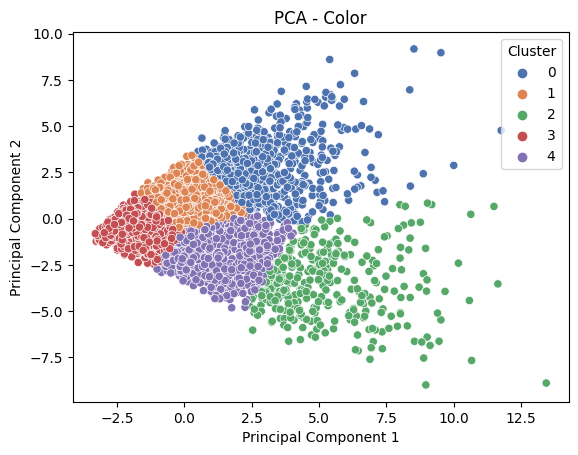

In [28]:
# test = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_final['Cluster'], cmap='rainbow')
sns.scatterplot(x = pca_result[:, 0], y = pca_result[:, 1], hue=df_final['Cluster'], legend = 'full', palette='deep')
plt.title('PCA - Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# cbar = plt.colorbar(test)
# cbar.set_ticks(df_final['Cluster'])  # Set the ticks to your 'c' values
# cbar.set_ticklabels(df_final['Cluster'])  # Set the tick labels to your 'c' values
# plt.colorbar()
# plt.legend()